<a href="https://colab.research.google.com/github/lucca-miorelli/sf_airbnb/blob/main/San_Francisco_Aribnb_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *San Francisco*
*Lucca Miorelli* ([Github](https://github.com/lucca-miorelli/ds_projects), [Linkedin](https://www.linkedin.com/in/lucca-miorelli/))

---

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="20%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de San Francisco, e ver quais insights podem ser extraídos a partir de dados brutos.**

In [1]:
!pip install plotly==5.5.0

     |████████████████████████████████| 26.5 MB 1.4 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


## Obtenção dos Dados


In [2]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objects as go
import plotly.express as px

import json
from urllib.request import urlopen

%matplotlib inline

In [3]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/ca/san-francisco/2021-11-02/visualisations/listings.csv")

# importar arquivo com geolocalização http://data.insideairbnb.com/united-states/ca/san-francisco/2021-11-02/visualisations/neighbourhoods.geojson
with urlopen('http://data.insideairbnb.com/united-states/ca/san-francisco/2021-11-02/visualisations/neighbourhoods.geojson') as response:
    geo = json.load(response)

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,NaN,Western Addition,37.77028,-122.43317,Entire home/apt,161,2,308,2021-10-16,3.57,1,139,42,City Registration Pending
1,5858,Creative Sanctuary,8904,Philip And Tania,NaN,Bernal Heights,37.74474,-122.42089,Entire home/apt,235,30,111,2015-08-28,0.76,1,365,0,NaN
2,7918,A Friendly Room - UCSF/USF - San Francisco,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,56,32,19,2020-03-06,0.17,9,365,0,NaN
3,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,56,32,8,2017-08-12,0.10,9,365,0,NaN
4,8339,Historic Alamo Square Victorian,24215,Rosy,NaN,Western Addition,37.77564,-122.43642,Entire home/apt,895,7,28,2019-06-28,0.19,2,364,0,STR-0000264


Cada linha (entrada) do dataframe é um registro de imóvel no Airbnb; cada coluna, por sua vez, é uma informação que define o imóvel (vamos detalhar mais adiante).

A célula acima nos permite ver as 5 primeiras entradas do dataframe. Logo na primeira linha, perceba que a Holly (`host_name`)  tem um imóvel registrado no bairro (`neighbourhood`) Western Addition.

Ainda observando o imóvel de Holly, o custo de pernoite (`price`) é de $161. **Será que, para San Francisco, isso é caro ou barato?**

Vamos buscar as respostas nos próprios dados!

## Análise dos Dados


In [5]:
# informações do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6508 entries, 0 to 6507
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6508 non-null   int64  
 1   name                            6508 non-null   object 
 2   host_id                         6508 non-null   int64  
 3   host_name                       6495 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   6508 non-null   object 
 6   latitude                        6508 non-null   float64
 7   longitude                       6508 non-null   float64
 8   room_type                       6508 non-null   object 
 9   price                           6508 non-null   int64  
 10  minimum_nights                  6508 non-null   int64  
 11  number_of_reviews               6508 non-null   int64  
 12  last_review                     51

Perceba que o tipo das colunas são `int64`, `float64` (númericos inteiros e decimais, respectivamente) e `object`, que são variáveis não numéricas, normalmente contendo algum tipo de texto.

Para facilitar o entendimento dos próximos passos, aqui está um **dicionário das variáveis** do dataset:

**Dicionário de variáveis**

* `id`- número identificador, único de cada imóvel.
* `name` - nome do imóvel.
* `host_id` - número identificador do anfitrião na plataforma.
* `host_name`- nome do anfitrião.
* `neighbourhood_group`- NaN (sem valores válidos)
* `neighbourhood`- nome do bairro onde o imóvel está localizado.
* `latitude` - latitude do imóvel.
* `longitude`- longidutde do imóvel
* `room_type` - tipo de acomodação.
* `price` - preço da estadia em Euros por noite.
* `minimum_nights`- número mínimo de pernoites para locação do imóvel.
* `number_of_reviews`- quantidade de reviews no app que o imóvel possui.
* `last_review`- data da última review realizada.
* `reviews_per_month`- quantidade média de reviews por mês.
* `calculated_host_listings_count`- quantidade de imóveis do anfitrião.
* `availability_365`- número de dias de disponibilidade dentro de 365 dias.


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [6]:
# identificar a dimensão do dataset
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# identificar tipo das variáveis
df.dtypes

Entradas:	 6508
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

Com o código acima, de acordo com o dataset disponibilizado há **6.508** imóveis registrados na plataforma em San Francisco.

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Este é um passo muito importante para a **Análise Exploratória** dos dados, mas principalmente para a construção de um modelo de **Machine Learning**, onde devemos tratar os valores faltantes de alguma forma - seja ela por imputação ou remoção.

Como agora estamos apenas preocupados com a Análise Exploratória dos dados, vamos deixar este tema para a próxima... Por enquanto, vamos visualizar os dados faltantes.

In [7]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("o dataframe selecionado tem " + str(df.shape[1]) + " colunas.\n"      
            "Há " + str(mis_val_table_ren_columns.shape[0]) +
              " colunas com valores faltantes.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
    
data_missing = missing_values_table(df)
data_missing

o dataframe selecionado tem 18 colunas.
Há 5 colunas com valores faltantes.


,Missing Values,% of Total Values
neighbourhood_group,6508,100.0
license,2718,41.8
last_review,1378,21.2
reviews_per_month,1378,21.2
host_name,13,0.2


Text(0.5, 1.0, 'Distribuição de valores faltantes no Dataset.')

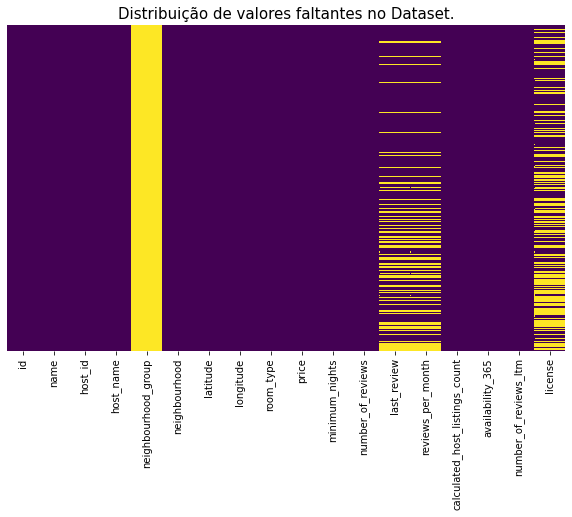

In [8]:
# mostrar visualmente valores faltantes
plt.figure(figsize=(10,6))
ax = sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis', cbar=False)
ax.set_title('Distribuição de valores faltantes no Dataset.', fontsize=15)


Como podemos pereber, a coluna com 100% dos valores faltantes nem faz sentido ser utilizada. 

A coluna `license` (com 41.8% de valores nulos), assim como `last_review` e `reviews_per_month` (21.2%), contém dados que não serão relevantes para nossa análise neste momento, então vamos dispensar estas colunas.

Já a coluna `host_name` contém apenas 0,2% de valores nulos, o que neste caso não representa uma parcela significativa na nossa análise. 

### **Q3. Qual o tipo de distribuição das variáveis?** 

Este é um primeiro passo importante para descobrirmos se há algum *outlier* presente. Isto é, valores que fogem muito da distribuição (muito baixos ou muito altos).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f477bd103d0>,
      dtype=object)

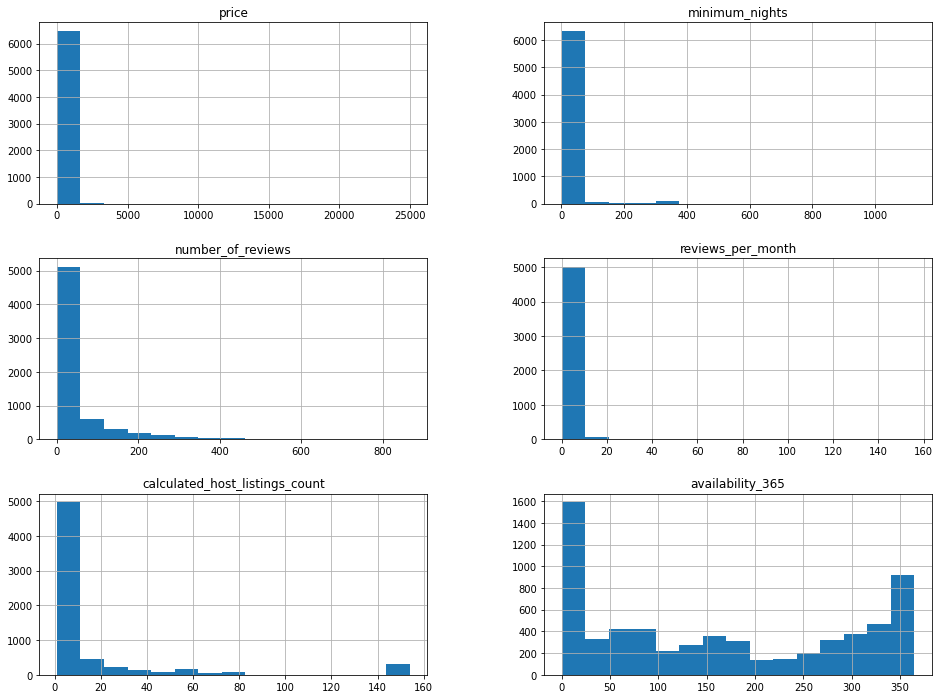

In [9]:
# plotar o histograma das variáveis numéricas
numerical_columns = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
numerical_df = df[numerical_columns]
numerical_df.hist(bins=15, figsize=(16,12))

### **Q4. Qual a média dos preços de aluguel?**

In [10]:
# ver a média da coluna `price``
print(f'O preço médio de pernoite em San Francisco é: U$ {df.price.mean():0.2f}')
print(f'A mediana dos preços de pernoite em San Francisco é: U$ {df.price.median():0.2f}')

O preço médio de pernoite em San Francisco é: U$ 235.65
A mediana dos preços de pernoite em San Francisco é: U$ 149.00


Porém, há alguns pontos de atenção, como:
* Há influência expressiva de *outliers* nesse resultado?
* Estamos falando do mesmo tipo de imóvel?
* Será que a média não varia de acordo com os bairros?
  * Imagine o preço de um imóvel com vista para a Golden Gate, ou um imóvel dentro de uma das mais famosasa *Chinatown* do mundo!

#### **Q4.1. Tratamento de dados**


Agora, vamos excluir as colunas que não nos interessam na análise e analisar a distribuição estatítisca de cada coluna numérica.

In [11]:
# buscar por outliers
numerical_columns.remove('reviews_per_month')
df[numerical_columns].describe()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,6508.000000,6508.000000,6508.000000,6508.000000,6508.000000
mean,235.649355,23.472956,44.011524,15.183774,161.842348
std,687.026273,49.751298,84.354940,33.020106,134.338598
min,0.000000,1.000000,0.000000,1.000000,0.000000
25%,95.000000,2.000000,1.000000,1.000000,28.000000
50%,149.000000,30.000000,7.000000,2.000000,145.000000
75%,239.000000,30.000000,45.000000,10.000000,303.000000
max,25000.000000,1125.000000,867.000000,154.000000,365.000000


Observa-se que em algumas colunas, há outliers evidentes e suspeitos.
* Por exemplo, a coluna `minimum_nights` tem média de 23.5 mas o máximo valor é de 1125. Estranho, não? 😖

Vamos verificar graficamente e realizar trabalhar com os interquartis, fazendo a remoção destes outliers:

In [12]:
# remover colunas desnecessárias
df.drop(columns=['last_review', 'license', 'neighbourhood_group', 'reviews_per_month'], axis=1, inplace=True)

minimum_nights: valores acima de 30:
389 entradas
5.9773%


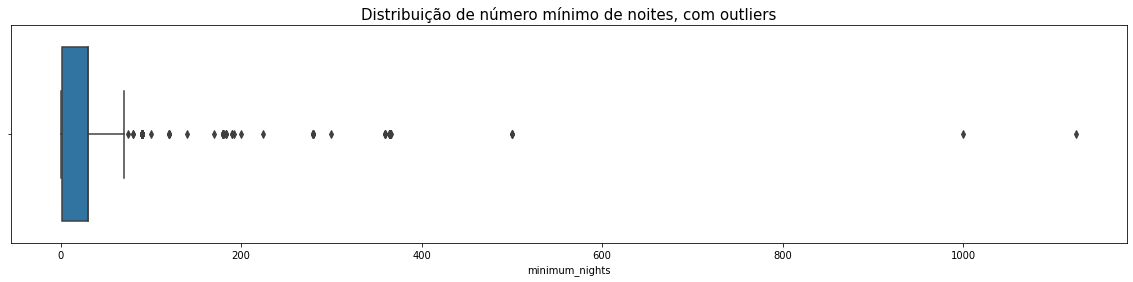

In [13]:
# minimum nights

#fig = go.Figure()
#fig.add_trace(go.Box(x=df.minimum_nights))
#ig.update_layout(title_text = "Distribuição de número mínimo de noites, com outliers")
#fig.update_yaxes(title_text="minimum_nights")
#fig.show()

plt.figure(figsize=(20,4))
ax = sns.boxplot(x=df["minimum_nights"])
ax.set_title("Distribuição de número mínimo de noites, com outliers", fontsize=15)

# ver a quantidade de valores acima de 30 dias 
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))




price: valores acima de 1000
93 entradas
1.4290%


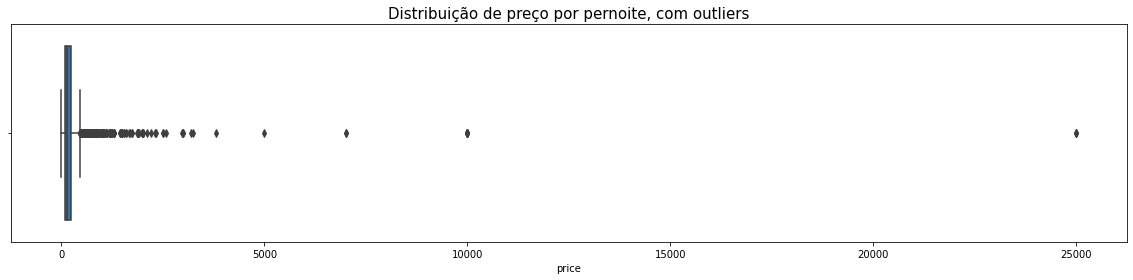

In [14]:
# price

#fig = go.Figure()
#fig.add_trace(go.Box(x=df.price))
#fig.update_layout(title_text = "Distribuição de preço por pernoite, com outliers")
#fig.update_yaxes(title_text="price")
#fig.show()

plt.figure(figsize=(20,4))
ax = sns.boxplot(x=df["price"])
ax.set_title('Distribuição de preço por pernoite, com outliers', fontsize=15)

# quantidade de valores acima de 1000 para price
print("\nprice: valores acima de 1000")
print("{} entradas".format(len(df[df.price > 1000])))
print("{:.4f}%".format((len(df[df.price > 1000]) / df.shape[0])*100))


In [15]:
# remover outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_clean = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [16]:
# média e mediana dos preços com tratamento de outliers
print(f'A média de preço de pernoite em San Francisco, com remoção de outliers, é: U$ {df_clean.price.mean():0.2f}')
print(f'A mediana dos preços de pernoite em San Francisco, com remoção de outliers, é: {df_clean.price.median():0.2f}')

A média de preço de pernoite em San Francisco, com remoção de outliers, é: U$ 167.80
A mediana dos preços de pernoite em San Francisco, com remoção de outliers, é: 144.50


minimum_nights: valores acima de 30:
181 entradas
5.5864%


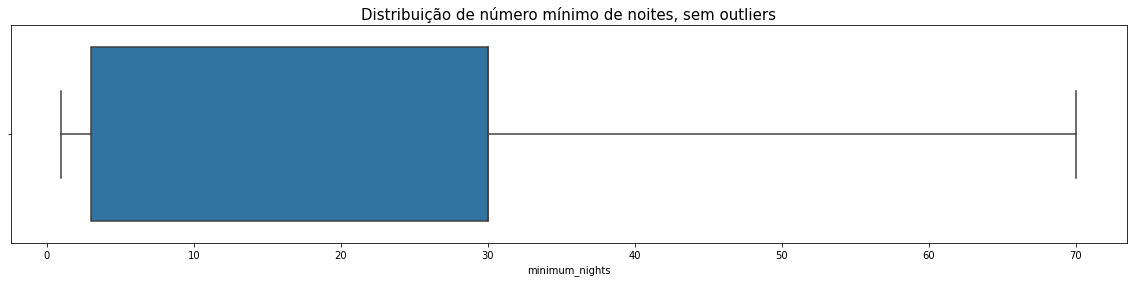

In [17]:
# minimum nights

#fig = go.Figure()
#fig.add_trace(go.Box(x=df_clean.minimum_nights))
#fig.update_layout(title_text = "Distribuição de número mínimo de noites, sem outliers")
#fig.update_yaxes(title_text="minimum_nights")
#fig.show()

plt.figure(figsize=(20,4))
ax = sns.boxplot(x=df_clean["minimum_nights"])
ax.set_title("Distribuição de número mínimo de noites, sem outliers", fontsize=15)


# ver a quantidade de valores acima de 30 dias 
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df_clean[df_clean.minimum_nights > 30])))
print("{:.4f}%".format((len(df_clean[df_clean.minimum_nights > 30]) / df_clean.shape[0])*100))


price: valores acima de 1000
0 entradas
0.0000%


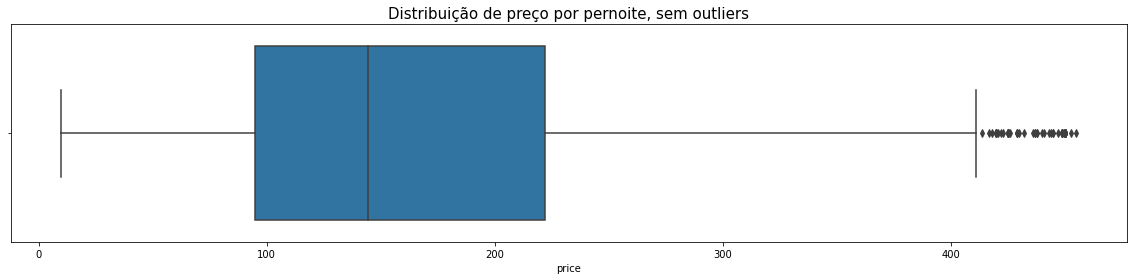

In [18]:
# price
#fig = go.Figure()
#fig.add_trace(go.Box(x=df_clean.price))
#fig.update_layout(title_text = "Distribuição de preço por pernoite, sem outliers")
#fig.update_yaxes(title_text="price")
#fig.show()

plt.figure(figsize=(20,4))
ax = sns.boxplot(x=df_clean["price"])
ax.set_title("Distribuição de preço por pernoite, sem outliers", fontsize=15)

# quantidade de valores acima de 1000 para price
print("\nprice: valores acima de 1000")
print("{} entradas".format(len(df_clean[df_clean.price > 1000])))
print("{:.4f}%".format((len(df_clean[df_clean.price > 1000]) / df_clean.shape[0])*100))

Com a remoção dos outliers, nossa análise ficará mais simples. 

#### **Q4.2 Como se comparam os preços médios de cada região com o preço médio da cidade?**

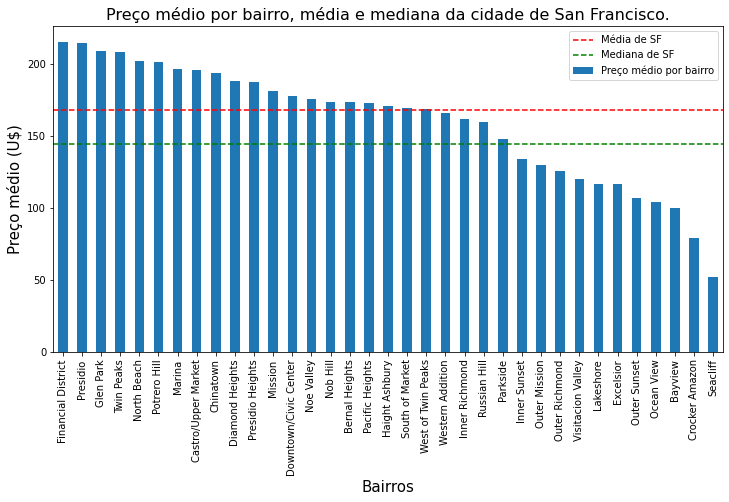

In [19]:
plt.figure(figsize=(12,6))

# barras com preços médios por bairro
avg_hood = df_clean.groupby('neighbourhood').price.mean().sort_values(ascending=False)
avg_hood.plot.bar()

#linha com preço médio da cidade
avg_city = df_clean.price.mean()
plt.axhline(y=avg_city, color='r', linestyle='--')

# linha da mediana de preços da cidade
median_city = df_clean.price.median()
plt.axhline(y=median_city, color='g', linestyle='--')

# adicionar legendas
plt.legend(loc='best', labels=['Média de SF', 'Mediana de SF', 'Preço médio por bairro'])
plt.xlabel('Bairros', fontsize=15)
plt.ylabel('Preço médio (U$)', fontsize=15)
plt.title('Preço médio por bairro, média e mediana da cidade de San Francisco.', fontsize=16)

plt.show()

### **Q5. Qual a correlação existente entre as variáveis?**

O principal objetivo da análise de dados é **responder perguntas de negócio**. Neste caso, será que existe relação de `price` com alguma outra variável?

Vamos analisar se existe relação linear entre as variáveis numéricas:

#### **Q5.1 Correlação com outliers removidos**

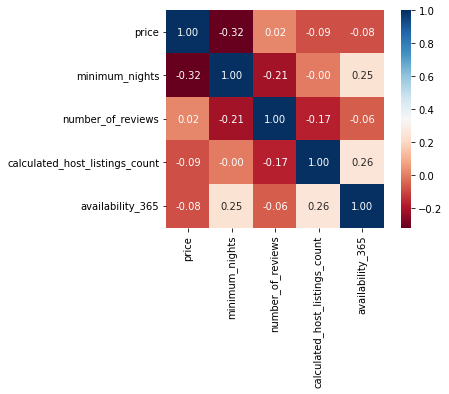

In [20]:
# criar uma matriz de correlação
corr = df_clean[numerical_columns].corr()

# mostrar a matriz de correlação
sns.heatmap(corr, square = True, annot=True, fmt=".2f", linecolor='white', cmap='RdBu')

#### **Q5.2 Correlação sem tratamento dos dados**

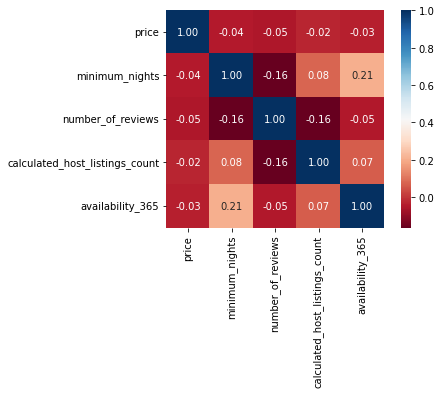

In [21]:
# plotar um heatmap a partir das correlações sem tratamento de outliers e ver diferença
sns.heatmap(df[numerical_columns].corr(), square = True, annot=True, fmt=".2f", linecolor='white', cmap='RdBu')

Deste ponto de vista, **não houve nenhuma relação linear expressiva das variáveis com `price`**, pois nenhuma coluna está muito longe do zero. Entretanto, percebe-se que os valores variam antes e depois do tratamento de outliers. Por exemplo⁉
* A diferença da correlação linear entre `price`e `minimum_nights` antes e depois do tratamento é expressiva. Com todos outliers presentes, o **coeficiente de correlação linear** foi quase nulo (-0.04), enquanto que para o outro caso houve uma correlação linear negativa de -0.32.
* Este segundo caso indica que há uma leve correlação negativa entre o preço e o número mínimo de noites, ou seja, quanto maior o número mínimo de pernoites, menor tende a ser o preço por diária.
* O que até faz sentido: atrai hóspedes que querem permanecer por mais tempo e gastar menos, e  garante que o imóvel não fique desocupado.

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

In [22]:
# mostrar a porcentagem de cada tipo de imóvel disponível
type_percentage = df_clean.room_type.value_counts() / df_clean.shape[0]

fig = go.Figure(data=[go.Pie(labels=df_clean.room_type.unique(), values=type_percentage, hole=.5)])
fig.show()

#### **Q6.1 Comparando os preços de acordo com o tipo de imóvel.**

In [23]:
# agrupando dados por neighbourhood e room_type
avg_hood_type = pd.DataFrame(df_clean.groupby(by=['neighbourhood', 'room_type']).price.mean())
avg_hood_type

price
neighbourhood      room_type                  
Bayview            Entire home/apt  154.365854
                   Private room      71.455696
                   Shared room      100.000000
Bernal Heights     Entire home/apt  196.623188
                   Private room      96.952381
...                                        ...
West of Twin Peaks Private room      91.260870
Western Addition   Entire home/apt  183.202186
                   Hotel room       316.333333
                   Private room     132.494624
                   Shared room       54.400000

[86 rows x 1 columns]

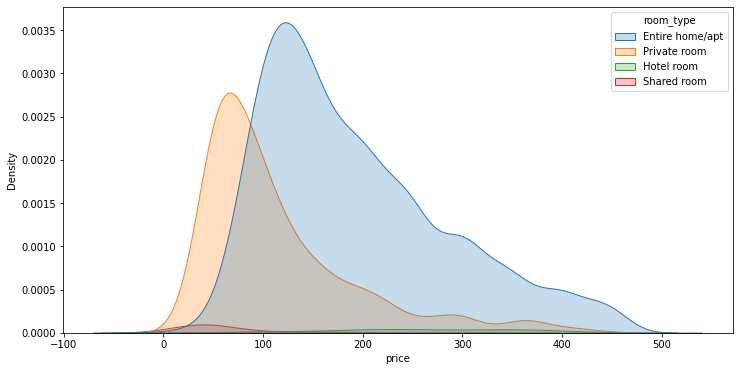

In [24]:
# gráfico de deistribuição de preços com diferentes tipos de acomodação
plt.figure(figsize=(12,6))
sns.kdeplot(data = df_clean, x='price',
            hue='room_type', fill=True)

### **Q7. Qual a localidade mais cara do dataset?**



In [25]:
#DISTRIBUIÇÃO DE PREÇOS POR BAIRRO
fig = px.box(df_clean, y="price", x='neighbourhood')
fig.show()

In [39]:
# SCATTER DE CASAS COM COR POR PREÇO
fig = px.scatter_mapbox(df_clean, lat="latitude", lon="longitude", hover_name="neighbourhood", hover_data=["price"], color = df_clean.price,
                        color_continuous_scale= 'Bluered_r', zoom=3, height=300, title='Mapa de distribuição dos imóveis em San Francisco')
fig.update_layout(
    mapbox_style = "carto-positron", #Decide a style for the map
    mapbox_zoom = 11.5, #Zoom in scale
    mapbox_center = {"lat": df_clean['latitude'].mean(), "lon": df_clean['longitude'].mean()}, #Center location of the map
width=1200, height=800)
fig.show()

In [27]:
# CRIAR DATAFRAME COM COUNT DE APARTMENTS POR NEIGHBOURHOOD
hood_series_count = df_clean.groupby('neighbourhood').price.count().sort_values(ascending=True)
hood_count = pd.DataFrame(data = hood_series_count,
                          columns = ['price'])
hood_count.reset_index(inplace=True)
hood_count.columns = ['neighbourhood', 'locations']

#criar dataframe com preço médio por bairro (CUDIAR POIS AMOSTRA PODE NÃO SER REPRESENTATIVA)
avg_hood_df = pd.DataFrame(data = avg_hood,
                           columns = ['price'])
avg_hood_df.reset_index(inplace=True)
avg_hood_df.columns = ['neighbourhood', 'price']

avg_hood_df

,neighbourhood,price
0,Financial District,215.571429
1,Presidio,214.400000
2,Glen Park,209.272727
3,Twin Peaks,208.480000
4,North Beach,201.920000
5,Potrero Hill,201.662791
6,Marina,196.422680
7,Castro/Upper Market,195.653409
8,Chinatown,193.859649
9,Diamond Heights,188.166667


In [41]:
# PREÇO MÉDIO POR BAIRRO EM MAPA: onde estão os pontos turísticos?
fig = px.choropleth_mapbox(avg_hood_df, geojson=geo, color = 'price',
                           locations='neighbourhood', color_continuous_scale="Viridis",
                           range_color=(0, 220), featureidkey = "properties.neighbourhood",
                           mapbox_style="carto-positron",
                           zoom=11, center = {"lat":  37.7749, "lon": -122.4194},
                           opacity = 0.6, title='Mapa de preços médios por bairro de San Francisco (US$)'
                          )
#fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_layout(
    mapbox_style = "carto-positron", #Decide a style for the map
    mapbox_zoom = 11.5, #Zoom in scale
    mapbox_center = {"lat": 37.7749, "lon": -122.4194}, #Center location of the map
width=1200, height=800)
fig.show()

Percebe-se que há uma tendência de que áreas mais turísticas tenham preços de pernoite mais elevados. Essa correlação pode não ser causalidade direta e oturos fatores podem influenciar na análise.

O próprio dataset utilizado pode conter viéses, visto que o número de acomodações em certos bairros é pequeno o que indica um viés de amostragem. Com um dataset maior, seria possível obter mais análises.

Abaixo, percebe-se que o bairo **Presidio** (um dos bairros mais caros do mapa acima, e muito próximo da famosa Golden Gate) possui somente 5 acomodações, levando a um preço médio enviesado. Assim como o bairro **Seacliff**, que contém somente 2 acomodações neste dataset.

In [29]:
hood_count

,neighbourhood,locations
0,Seacliff,2
1,Presidio,5
2,Diamond Heights,6
3,Lakeshore,11
4,Presidio Heights,14
5,Crocker Amazon,23
6,Visitacion Valley,24
7,Twin Peaks,25
8,Glen Park,33
9,Parkside,34


### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Somente a média pode não representar bem a amostragem, portanto, vamos analisar a distribuição desta variável no dataset.

In [30]:
df_clean.minimum_nights.describe()

count    3240.000000
mean       21.835802
std        13.869954
min         1.000000
25%         3.000000
50%        30.000000
75%        30.000000
max        70.000000
Name: minimum_nights, dtype: float64

Text(0.5, 1.0, 'Distribuição de mínimo de noites em San Francisco')

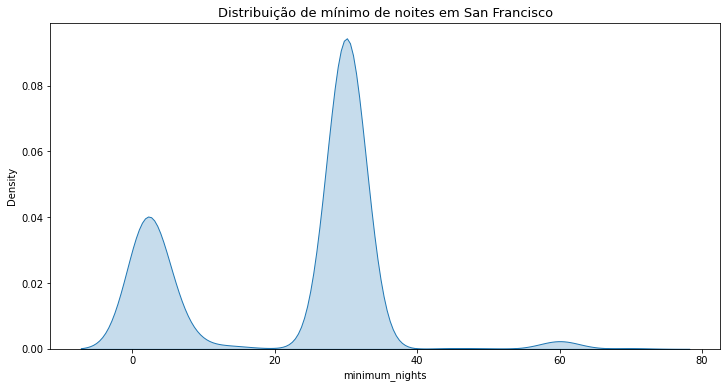

In [31]:
# distribuição de número mínimo de noites em san francisco
plt.figure(figsize=(12,6))
ax = sns.kdeplot(data=df_clean, x='minimum_nights', fill=True)
ax.set_title('Distribuição de mínimo de noites em San Francisco', fontsize=13)

No gráfico de distribuição acima, podemos perceber 2 picos principais:
* O maior está próximo de 30, o que indica que a maioria das acomodações de San Francisco exigem estadia mínima de 30 dias - estadia mensal.
* O segundo maior pico está próximo de 1, o que indica que estas acomodações permitem tempo de acomodação diário ou muito próximo disto.
* Um terceiro pico pode ser citado (porém não tão relevante quanto os outros dois), que está próximo de 60. Isto indica que estas acomodações exigem estadia mínimo de 2 meses.

### **PLOT TWIST**: Airbnb's no bairro do Headquarter do Airbnb!

In [32]:
soma = df_clean[df_clean['neighbourhood']=='South of Market']
soma.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
109,209420,Luxury Modern Loft,1031942,Rachel,South of Market,37.76996,-122.40380,Entire home/apt,225,30,5,3,333,0
129,271602,Luxury Condo Downtown/ SoMa,1421296,Richard,South of Market,37.77907,-122.40503,Entire home/apt,81,30,110,1,269,5
146,329020,"The Clock Tower, circa 1907.",326840,Jorge,South of Market,37.78377,-122.39275,Entire home/apt,250,30,6,1,0,0
216,616517,Beautiful and Spacious Loft - SOMA,3055666,Steven,South of Market,37.77459,-122.40768,Entire home/apt,199,30,110,1,350,4
217,626349,Sunny Modern Luxury Condo!,2528117,Sean,South of Market,37.78097,-122.40628,Entire home/apt,84,30,47,1,43,6


In [33]:
soma[['price', 'minimum_nights']].describe()

,price,minimum_nights
count,223.000000,223.000000
mean,169.457399,25.910314
std,80.490538,12.073761
min,33.000000,1.000000
25%,110.000000,30.000000
50%,150.000000,30.000000
75%,212.000000,30.000000
max,449.000000,70.000000


In [34]:
soma['room_type'].value_counts()/soma['room_type'].count()

Entire home/apt    0.726457
Private room       0.233184
Hotel room         0.022422
Shared room        0.017937
Name: room_type, dtype: float64

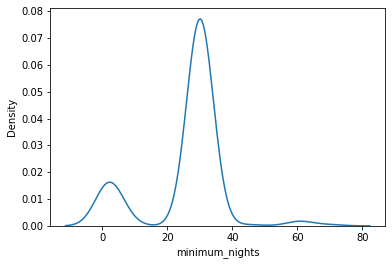

In [35]:
sns.kdeplot(soma['minimum_nights'])

## Conclusões


Algumas conclusões simples desta análise exploratória de dados foram:

1.   Há baixa ou nula correlação linear entre as variáveis.
2.   Bairros com preço médio mais caros normalmente contêm algum ponto turístico notável e estão localizados em áreas mais centrais da cidade, como *Financial District*.
3.   O bairro *Mission* é o que contém maior número de acomodações na cidade.
4.   Mais de 60% das acomodações  de SF são do tipo *Entire home/apt*.
5.   A maioria das acomodações exige estadia mínima próxima de 30 dias.



<img alt="lucca_assinatura" width="60%" src="https://raw.githubusercontent.com/lucca-miorelli/ds_projects/main/lucca_github.png">

[Github](https://github.com/lucca-miorelli/ds_projects), [Linkedin](https://www.linkedin.com/in/lucca-miorelli/)